# Challenge! 
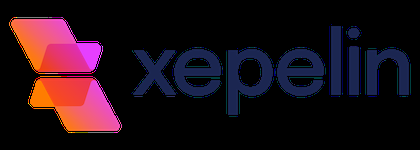

## Lectura Data Frame

In [9]:
import pandas as pd
import numpy as np

def read_df(data):
    """
    Base function to read the data frame using pandas dataframe
    Arguments:
        data: String including the name of the 
    
    Returns:
        df: Pandas dataframe of xepelin
    """
    # function to read the xepelin df
    df = pd.read_csv(data,parse_dates=['paidAt'])
    
    # Check for NA in any column
    print('Features with NA:\n'+str(df.isnull().sum()))
    print('\n% of data with NA: ' +str(round((df.isnull().sum().sum()/len(df))*100,2)))
    
    # Check for Duplicates
    print('Duplicates:\n'+str(df[df.duplicated(['invoiceId'],keep=False)]))
    
    # Return the df
    return df
    
df = read_df('data_test.csv')
df.head()

Features with NA:
PayerId                      0
ReceiverId                   0
invoiceId                    0
paidAt                     308
amount                       0
amountfinancedByXepelin      0
status                       0
dtype: int64

% of data with NA: 25.67
Duplicates:
Empty DataFrame
Columns: [PayerId, ReceiverId, invoiceId, paidAt, amount, amountfinancedByXepelin, status]
Index: []


,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID
1,93,11,18660730,2021-11-20,6418.28,624.48,PAID
2,122,12,18660731,2021-10-19,27979.20,10520.15,PAID
3,85,13,18660732,2021-11-13,183070.77,79421.63,PAID
4,87,14,18660733,2022-03-23,20532.00,20532.00,PAID


# EDA

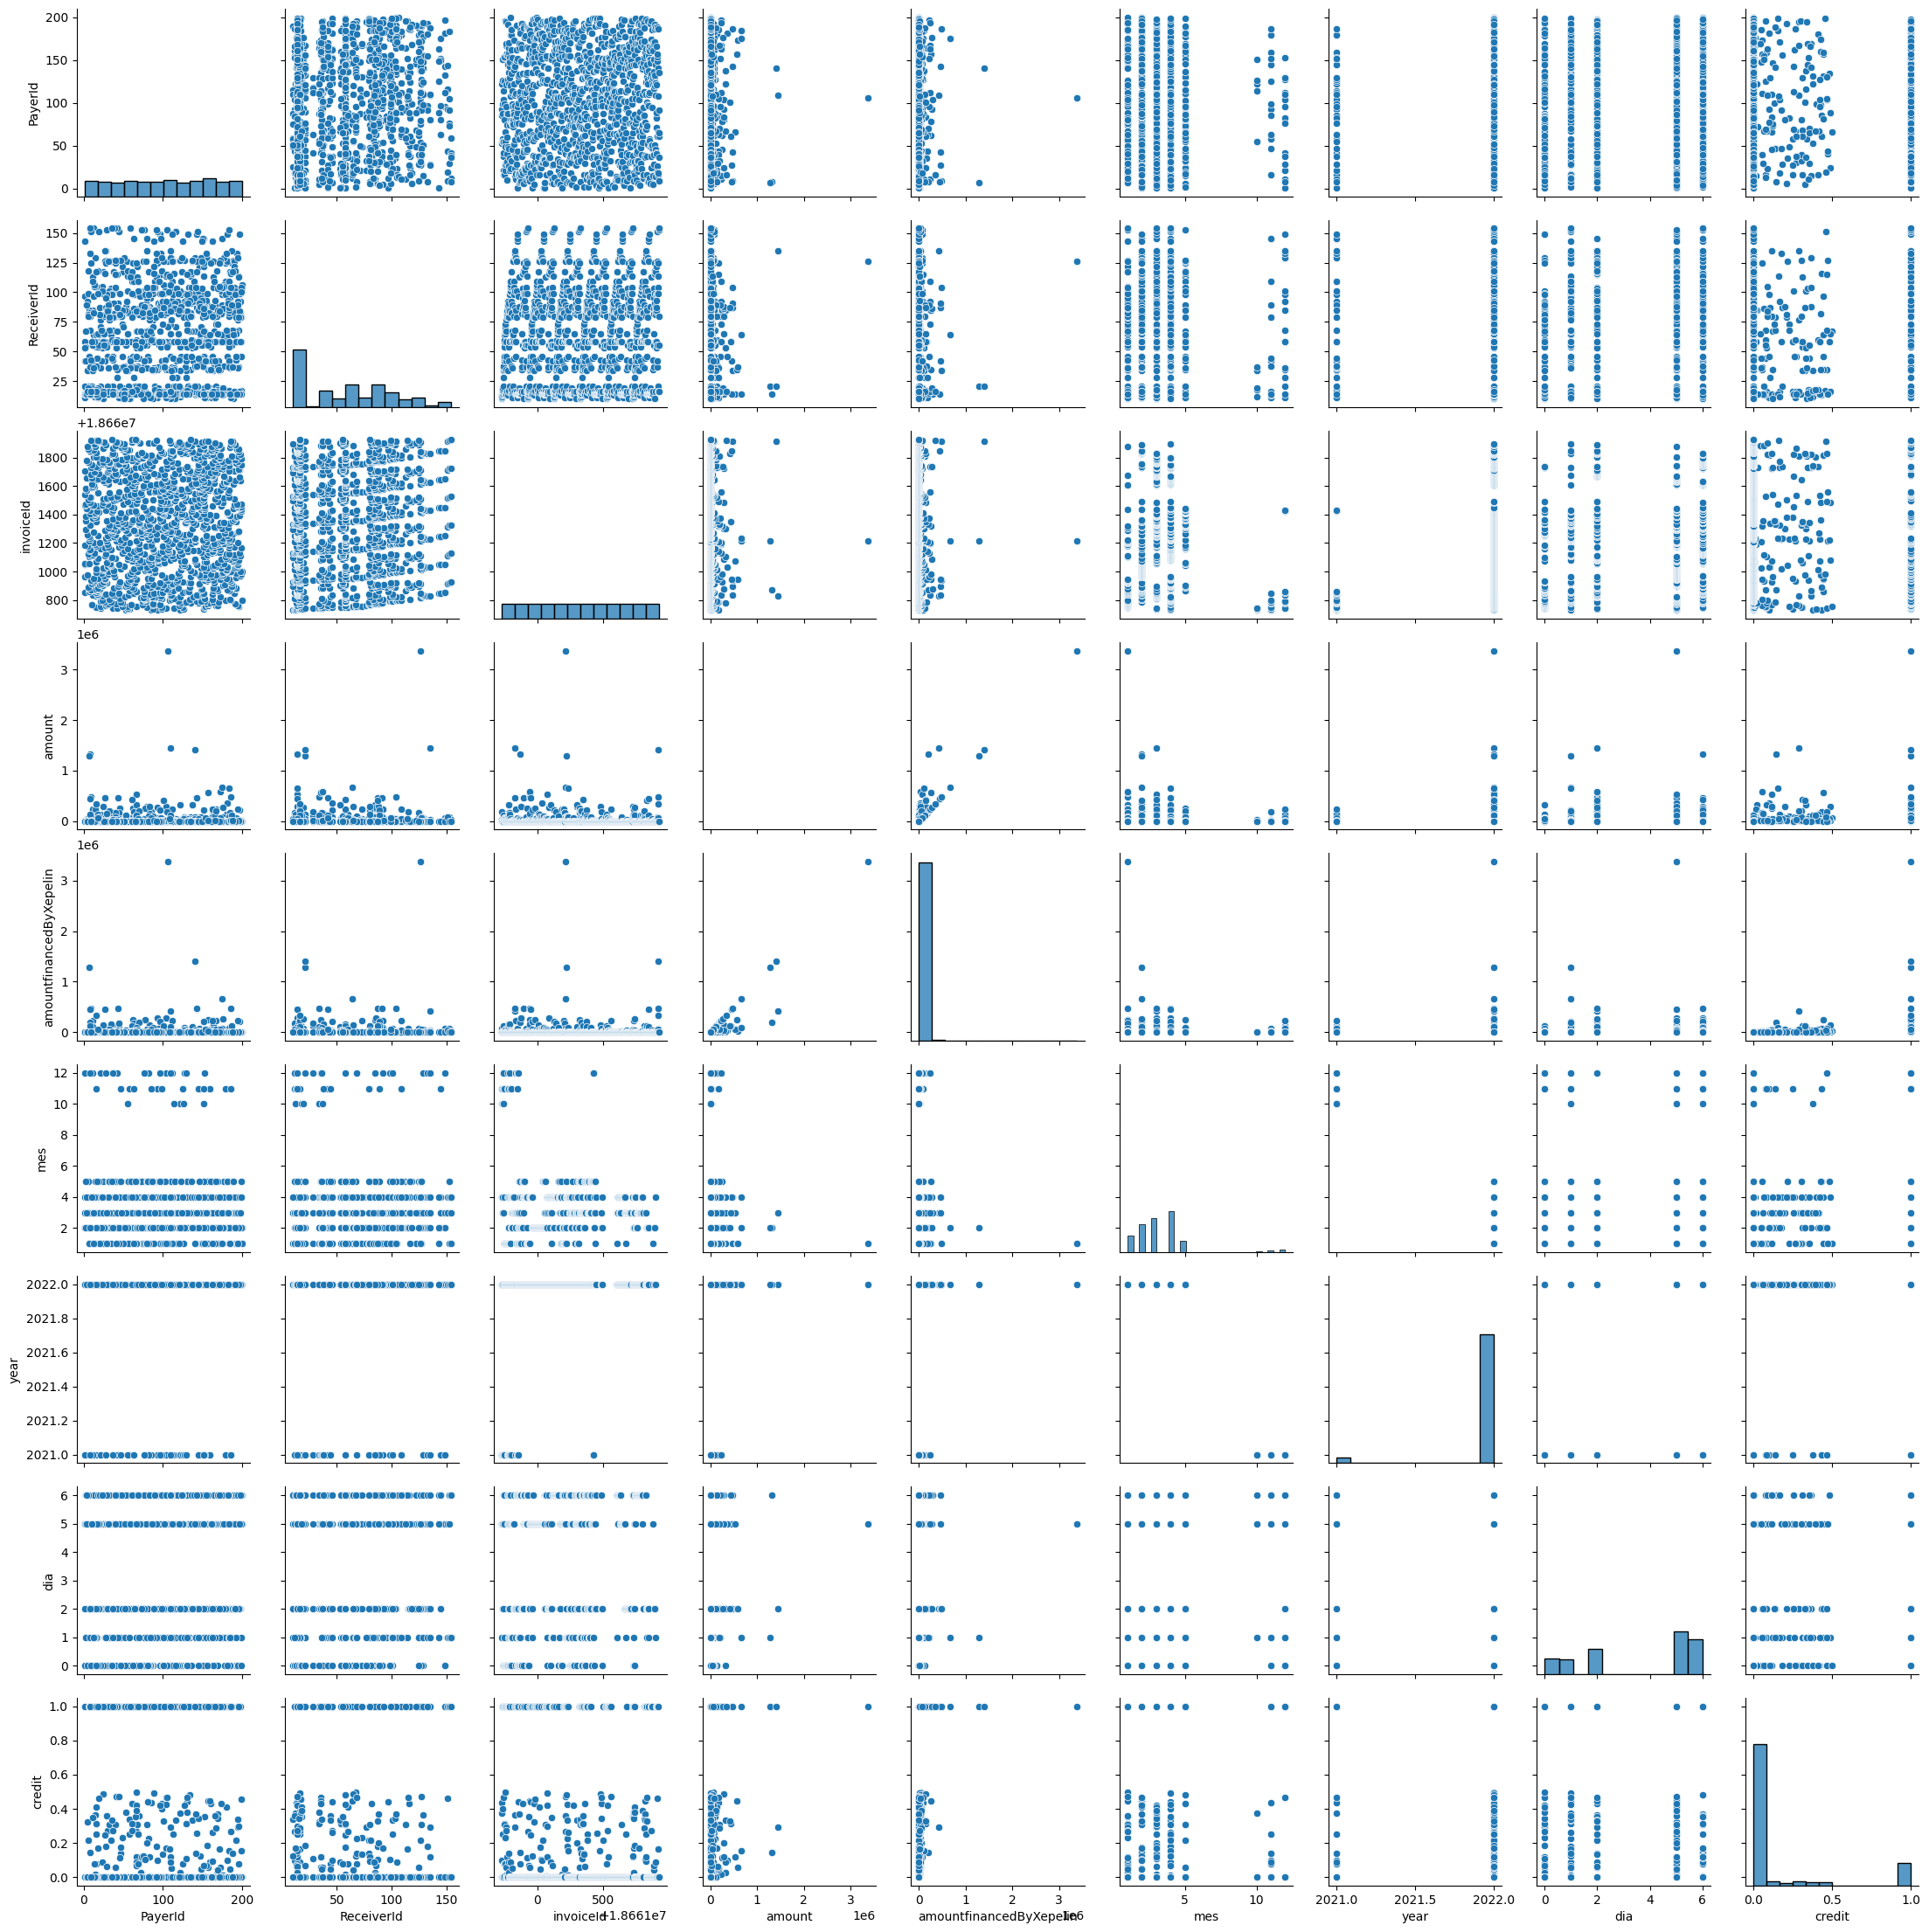

In [74]:
sns.pairplot(df)
plt.show()

## EDA - Transactions

In [10]:

def feature_eng(df):
    """
    Function used to do some feature engineering to the dataset
    Arguments:
        df: the xepelin pandas dataframe
    
    Returns:
        df: the xepelin dataframe with the added features
    """
    
    # Time variables
    df['mes'] = df['paidAt'].dt.month
    df['periodo'] = df['paidAt'].dt.to_period('M')
    df['year'] = df['paidAt'].dt.year
    df['dia'] = df['paidAt'].dt.dayofweek
    df['finde'] = np.where(df['dia'] > 4, 'weekend', 'weekday')
    
    # Monetary variables
    df['credit'] = round(df['amountfinancedByXepelin']/df['amount'],3)
    
    return df

df = feature_eng(df)
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,mes,periodo,year,dia,finde,credit
0,53,10,18660729,2022-04-23,1490.46,0.00,PAID,4.0,2022-04,2022.0,5.0,weekend,0.000
1,93,11,18660730,2021-11-20,6418.28,624.48,PAID,11.0,2021-11,2021.0,5.0,weekend,0.097
2,122,12,18660731,2021-10-19,27979.20,10520.15,PAID,10.0,2021-10,2021.0,1.0,weekday,0.376
3,85,13,18660732,2021-11-13,183070.77,79421.63,PAID,11.0,2021-11,2021.0,5.0,weekend,0.434
4,87,14,18660733,2022-03-23,20532.00,20532.00,PAID,3.0,2022-03,2022.0,2.0,weekday,1.000


In [128]:
df[df['status'] =='FAILED'].groupby(by=['PayerId']).agg({'amount':'sum','amountfinancedByXepelin':'sum','status':}).sort_values(by='amount',ascending=False)

,amount,amountfinancedByXepelin,status
PayerId,,,
140,1404452.75,1404452.75,1
186,487048.56,473518.36,2
16,341115.91,341115.91,1
19,85097.60,39208.54,1
18,65140.96,65140.96,1
154,62501.96,62501.96,1
108,48513.52,7877.44,1
151,20885.80,1354.71,1
157,17168.00,17168.00,1


### Plots

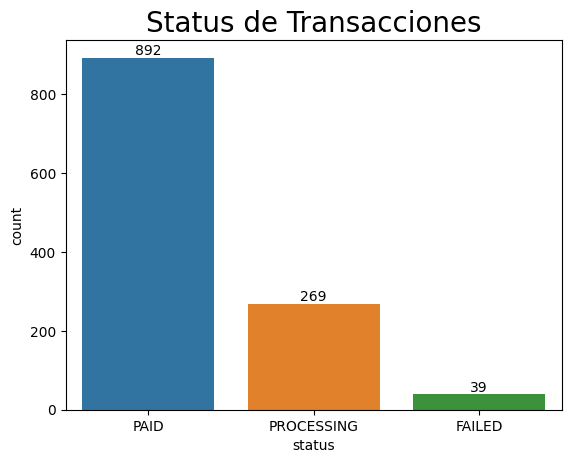

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.countplot(x="status",data=df)

for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Status de Transacciones', fontsize=20)
plt.show()


plt.show()

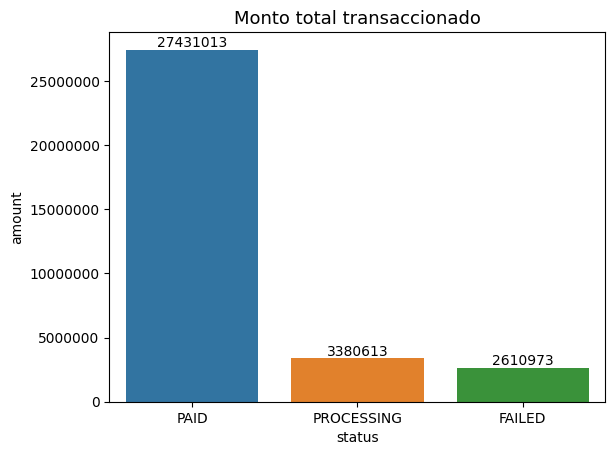

In [103]:
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

ax = sns.barplot(x='status',y='amount',data=df, estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(ax.containers[0], fmt='%.0f')
ax.set_title('Monto total transaccionado', fontsize=13)
plt.show()

Text(0.5, 1.0, 'Monto promedio transaccionado')

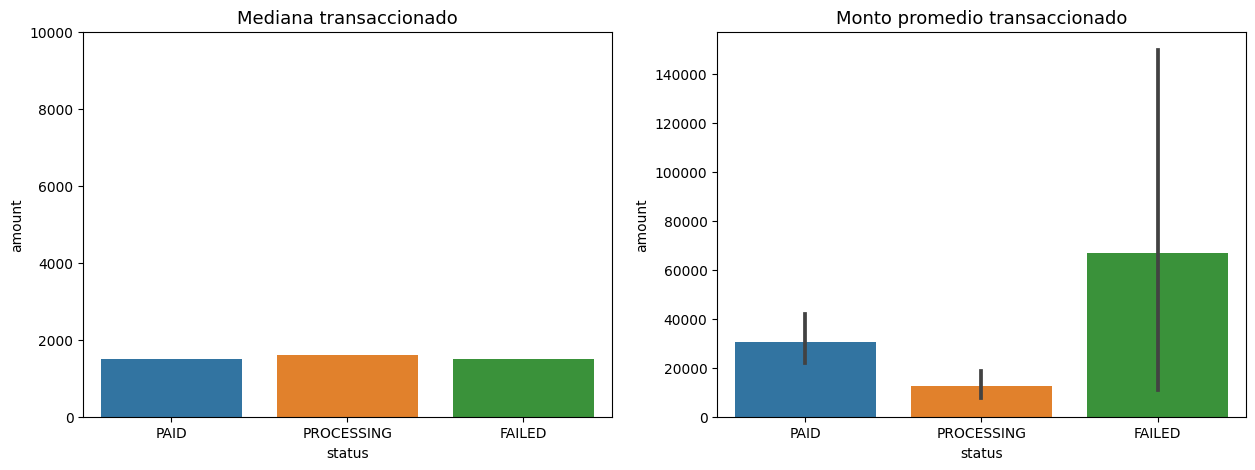

In [153]:
fig,ax =plt.subplots(1,2, sharex=True, figsize=(15,5))

sns.barplot(ax=ax[0],x='status',y='amount',data=df, estimator=np.median,ci=None)
ax[0].set_title('Mediana transaccionado', fontsize=13)
ax[0].set_ylim(0, 10000)
sns.barplot(ax=ax[1],x='status',y='amount',data=df)
ax[1].set_title('Monto promedio transaccionado', fontsize=13)

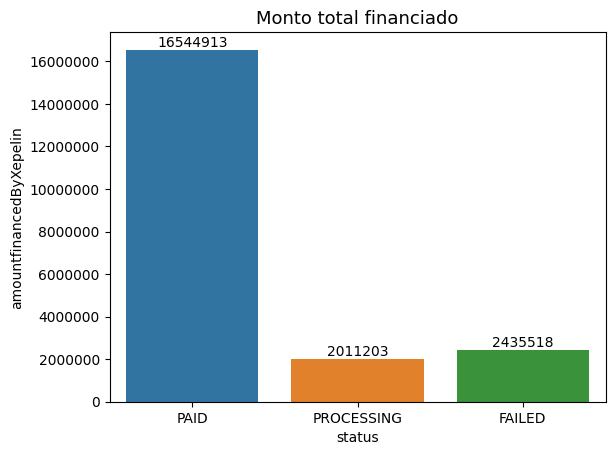

In [105]:
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

ax = sns.barplot(x='status',y='amountfinancedByXepelin',data=df, estimator=sum,ci=None)

for container in ax.containers:
    ax.bar_label(ax.containers[0], fmt='%.0f')
ax.set_title('Monto total financiado', fontsize=13)
plt.show()

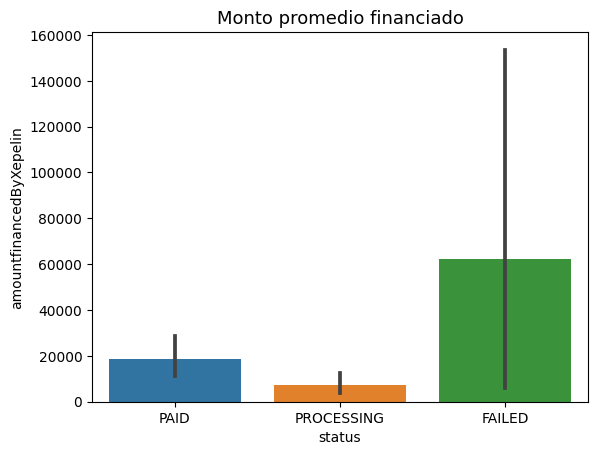

In [157]:
ax = sns.barplot(x='status',y='amountfinancedByXepelin',data=df)
ax.set_title('Monto promedio financiado', fontsize=13)
plt.show()

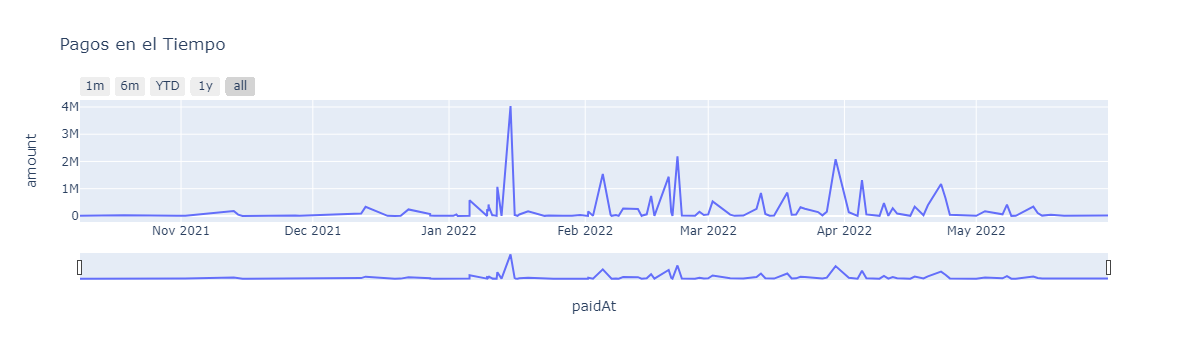

In [58]:
import plotly.express as px

df_group = df.groupby(by='paidAt',as_index=False).agg({'amount':'sum','amountfinancedByXepelin':'sum'})
df_group['credit'] = round(df['amountfinancedByXepelin']/df['amount'],4)*100
fig = px.line(df_group, x='paidAt', y='amount', title='Pagos en el Tiempo',hover_data={"paidAt": "|%B %d, %Y","credit":':.5f' })


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

<AxesSubplot:xlabel='periodo'>

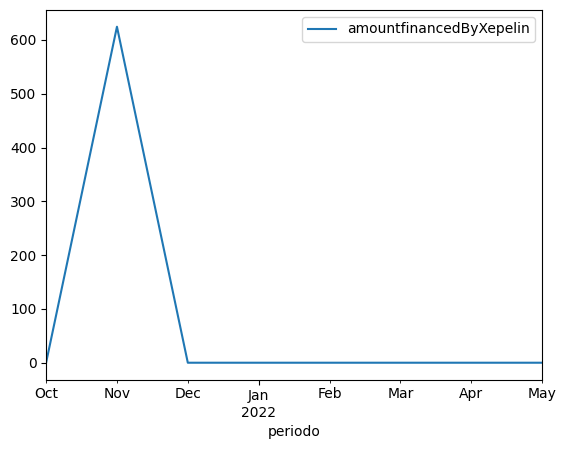

In [179]:
df.groupby(by='periodo').agg({'amountfinancedByXepelin':'mean'}).plot()

In [181]:
df.groupby(by='PayerId').paidAt.min().reset_index()

,PayerId,paidAt
0,1,2021-12-27 17:08:00
1,2,2022-02-15 00:00:00
2,3,NaT
3,4,2022-03-20 00:00:00
4,5,2022-02-05 00:00:00
...,...,...
195,196,2022-01-10 00:00:00
196,197,2022-03-23 00:00:00
197,198,2022-02-05 00:00:00
198,199,2022-02-05 00:00:00


## EDA - Users

In [22]:
def user_df(df):
    """
    Function used to build a user dataset, based on the transactions
    Arguments:
    df: the xepelin pandas dataframe
    
    Returns:
    df: dataframe agregated by user
    """
    # Get Dummy Status Columns
    df = pd.get_dummies(df,columns=['status'])
    
    pay_df = df.groupby(by=['PayerId','paidAt'],as_index=False).agg(
        pagos_mes=pd.NamedAgg(column='amount', aggfunc=sum),
        fin_total=pd.NamedAgg(column='amountfinancedByXepelin', aggfunc=sum),
        failed_total=pd.NamedAgg(column='status_FAILED', aggfunc=sum),
        prepro_total=pd.NamedAgg(column='status_PROCESSING', aggfunc=sum),
        paid_total=pd.NamedAgg(column='status_PAID', aggfunc=sum)
    )
    pay_df['paid_acum'] = (pay_df.groupby('PayerId')['paid_total'].apply(lambda x: x.shift().expanding().sum()))
    pay_df['pagoprom_acum'] = (pay_df.groupby('PayerId')['pagos_mes'].apply(lambda x: x.shift().expanding().mean()))
    pay_df['pago_ant'] = pay_df.groupby('PayerId')['paidAt'].apply(lambda x: x.shift())
    pay_df['pago_promedio_acum'] = (pay_df.groupby('PayerId')['pagos_mes'].apply(lambda x: x.shift().expanding().mean()))
    pay_df['dias_lastpaid'] = (pay_df['paidAt'] - pay_df['pago_ant']).dt.days
    return pay_df

user_df(df).head()

,PayerId,paidAt,pagos_mes,fin_total,failed_total,prepro_total,paid_total,failed_acum,paid_acum,pagoprom_acum,pago_ant,pago_promedio_acum,dias_lastpaid
0,1,2021-12-27 17:08:00,10523.52,10523.52,0,0,1,NaN,NaN,NaN,NaT,NaN,NaN
1,1,2022-02-05 00:00:00,1490.26,0.00,0,0,1,0.0,1.0,10523.520000,2021-12-27 17:08:00,10523.520000,39.0
2,1,2022-02-26 00:00:00,1490.26,0.00,0,0,1,0.0,2.0,6006.890000,2022-02-05 00:00:00,6006.890000,21.0
3,1,2022-03-12 00:00:00,1139.86,0.00,0,0,1,0.0,3.0,4501.346667,2022-02-26 00:00:00,4501.346667,14.0
4,1,2022-03-30 00:00:00,1225.66,0.00,0,0,1,0.0,4.0,3660.975000,2022-03-12 00:00:00,3660.975000,18.0


In [21]:
def user_df(df):
    """
    Function used to build a user dataset, based on the transactions
    Arguments:
    df: the xepelin pandas dataframe
    
    Returns:
    df: dataframe agregated by user
    """
    # Get Dummy Status Columns
    df = pd.get_dummies(df,columns=['status'])
    
    pay_df = df.groupby(by=['PayerId','paidAt'],as_index=False).agg(
        pagos_mes=pd.NamedAgg(column='amount', aggfunc=sum),
        fin_total=pd.NamedAgg(column='amountfinancedByXepelin', aggfunc=sum),
        failed_total=pd.NamedAgg(column='status_FAILED', aggfunc=sum),
        prepro_total=pd.NamedAgg(column='status_PROCESSING', aggfunc=sum),
        paid_total=pd.NamedAgg(column='status_PAID', aggfunc=sum)
    )
    pay_df['failed_acum'] = (pay_df.groupby('PayerId')['failed_total'].apply(lambda x: x.shift().expanding().sum()))
    pay_df['paid_acum'] = (pay_df.groupby('PayerId')['paid_total'].apply(lambda x: x.shift().expanding().sum()))
    pay_df['pagoprom_acum'] = (pay_df.groupby('PayerId')['pagos_mes'].apply(lambda x: x.shift().expanding().mean()))
    pay_df['pago_ant'] = pay_df.groupby('PayerId')['paidAt'].apply(lambda x: x.shift())
    pay_df['pago_promedio_acum'] = (pay_df.groupby('PayerId')['pagos_mes'].apply(lambda x: x.shift().expanding().mean()))
    pay_df['dias_lastpaid'] = (pay_df['paidAt'] - pay_df['pago_ant']).dt.days
    return pay_df

user_df(df).head()

,PayerId,paidAt,pagos_mes,fin_total,failed_total,prepro_total,paid_total,failed_acum,paid_acum,pagoprom_acum,pago_ant,pago_promedio_ant,dias_lastpaid
0,1,2021-12-27 17:08:00,10523.52,10523.52,0,0,1,NaN,NaN,NaN,NaT,NaN,NaN
1,1,2022-02-05 00:00:00,1490.26,0.00,0,0,1,0.0,1.0,10523.520000,2021-12-27 17:08:00,10523.520000,39.0
2,1,2022-02-26 00:00:00,1490.26,0.00,0,0,1,0.0,2.0,6006.890000,2022-02-05 00:00:00,6006.890000,21.0
3,1,2022-03-12 00:00:00,1139.86,0.00,0,0,1,0.0,3.0,4501.346667,2022-02-26 00:00:00,4501.346667,14.0
4,1,2022-03-30 00:00:00,1225.66,0.00,0,0,1,0.0,4.0,3660.975000,2022-03-12 00:00:00,3660.975000,18.0


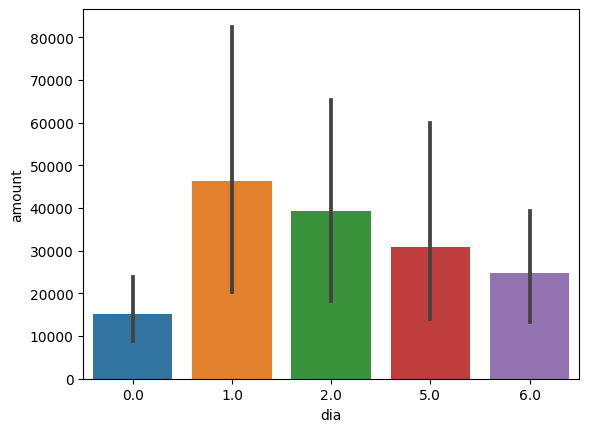

In [14]:
ax = sns.barplot(x="dia", y="amount", data=df)
#ax = sns.barplot(x="dia", y="amountfinancedByXepelin", data=df)

(0.0, 1000.0)

<Figure size 640x480 with 0 Axes>

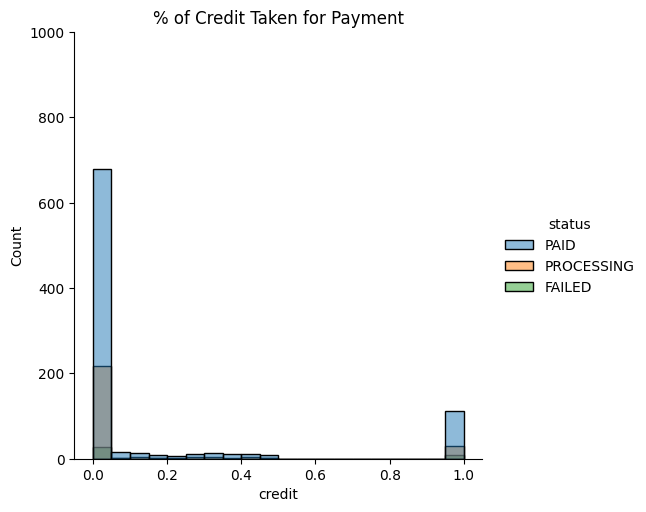

In [32]:
import seaborn as sns
plt.clf()

#sns.displot(df, x="credit", binwidth=0.05).set(title='% of Credit Taken for Payment')
sns.displot(df, x="credit", binwidth=0.05, hue="status").set(title='% of Credit Taken for Payment')
plt.ylim(0, 1000)

## EDA - Analyzing Status of Payments

In [112]:
df_failed = df[df['status'] == 'PROCESSING']
len(df_failed)

269

In [33]:
import networkx as nx
df_t = df[df['status'] == 'PAID']
G= nx.from_pandas_edgelist(df_t, 'PayerId', 'ReceiverId', ['paidAt','invoiceId', 'amount','amountfinancedByXepelin'],create_using=nx.MultiDiGraph())

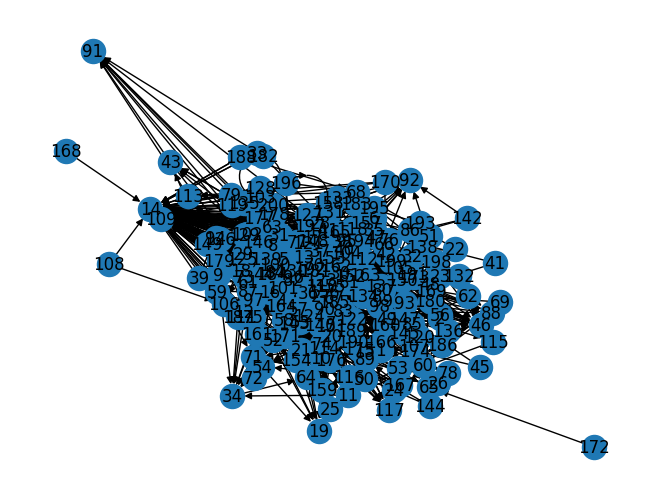

In [21]:
import matplotlib.pyplot as plt

# Draw the graph to screen
nx.draw(G,with_labels=True)
plt.show()


In [19]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops
def test(G):
    return [(u,s['amount']) for u, v, s in G.edges(data=True) if u == v]
print(test(G))                                    

[(16, 1118.46), (16, 14597.44), (21, 131973.2), (104, 2266.66), (81, 1225.46), (83, 1490.26), (127, 136.8), (103, 1490.46)]


In [35]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# User with max degree centrality
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most
print(prolific_collaborators)

[14]


In [48]:
nx.degree_centrality(G)

{53: 0.04040404040404041,
 10: 0.06060606060606061,
 93: 0.045454545454545456,
 11: 0.08585858585858587,
 122: 0.05555555555555556,
 12: 0.05555555555555556,
 85: 0.13131313131313133,
 13: 0.07575757575757576,
 87: 0.11111111111111112,
 14: 0.6313131313131314,
 58: 0.37373737373737376,
 15: 0.04040404040404041,
 99: 0.08080808080808081,
 16: 0.36868686868686873,
 55: 0.10101010101010102,
 17: 0.07070707070707072,
 126: 0.09090909090909091,
 18: 0.08080808080808081,
 151: 0.05555555555555556,
 19: 0.05555555555555556,
 37: 0.09595959595959597,
 21: 0.10606060606060606,
 42: 0.10606060606060606,
 28: 0.05050505050505051,
 34: 0.05555555555555556,
 104: 0.09595959595959597,
 35: 0.08080808080808081,
 36: 0.08080808080808081,
 114: 0.045454545454545456,
 38: 0.08080808080808081,
 125: 0.08080808080808081,
 44: 0.09090909090909091,
 153: 0.05555555555555556,
 46: 0.08585858585858587,
 54: 0.05050505050505051,
 80: 0.10101010101010102,
 60: 0.05555555555555556,
 154: 0.04040404040404041,
 64

In [52]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[(14, 58), (58, 16), (14, 16), (14, 129)]


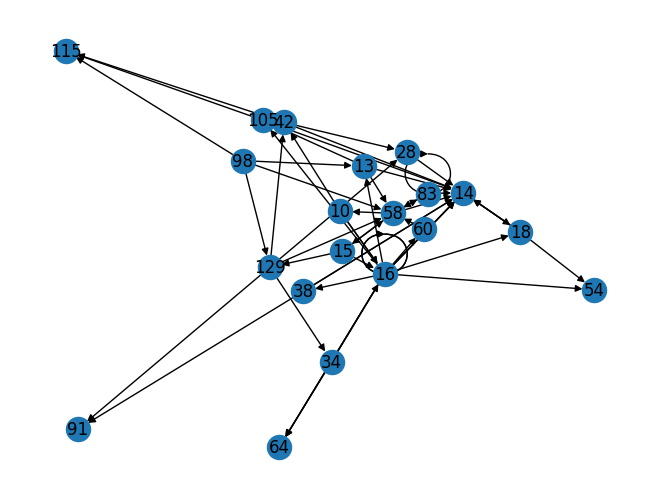

In [49]:
nodes_of_interest = [14,16,58,129,98]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
G_draw = get_nodes_and_nbrs(G,nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(G_draw,with_labels=True)
plt.show()

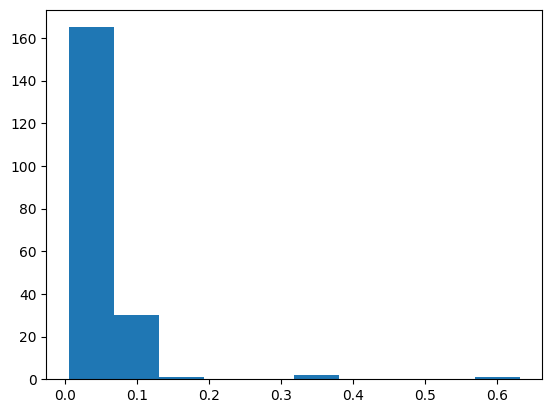

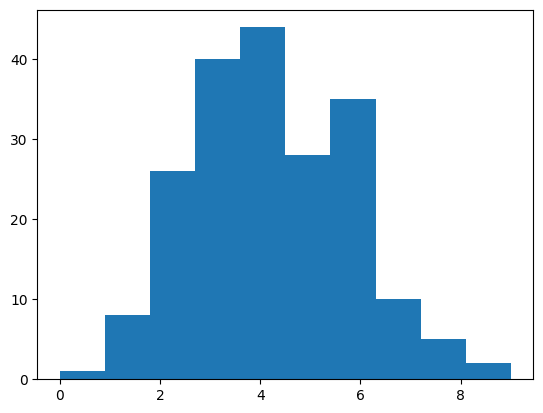

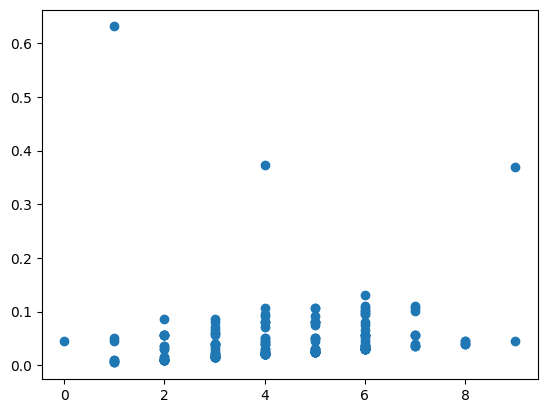

In [22]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(x = degrees,
         y = list(deg_cent.values()))
plt.show()

# Predict using time series Prophet

In [192]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-0.29.32-py2.py3-none-any.whl (986 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.15-py3-none-any.whl (181 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached PyMeeus-0.5.11.tar.gz (5.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached ephem-4.1.3-cp310-cp310-win_amd64.whl (1.4 MB)
     ---------------------------------------- 

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\alan.matys\AppData\Local\Temp\pip-install-58hy5ahi\pystan_06841a9c81e44918828274bbd66708df\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
